In [8]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv', parse_dates=['date'])

df_sorted = df.sort_values(by = ['state','date']) 

df_sorted['new_deaths'] = df_sorted.groupby(['state'])['deaths'].diff().fillna(0)
df_sorted['new_cases'] = df_sorted.groupby(['state'])['cases'].diff().fillna(0)

df_sorted.fillna('', inplace=True)

In [9]:
df_sorted.head(5)

,date,state,fips,cases,deaths,new_deaths,new_cases
586,2020-03-13,Alabama,1,6,0,0.0,0.0
637,2020-03-14,Alabama,1,12,0,0.0,6.0
689,2020-03-15,Alabama,1,23,0,0.0,11.0
742,2020-03-16,Alabama,1,29,0,0.0,6.0
795,2020-03-17,Alabama,1,39,0,0.0,10.0


<AxesSubplot:title={'center':'Plot for 10 States with Most Deaths'}, xlabel='month'>

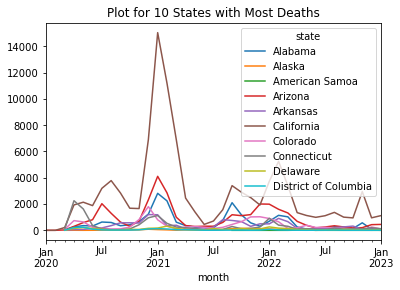

In [33]:
df_sorted['date'] = pd.to_datetime(df_sorted.date)
df_sorted['month'] = df_sorted['date'] + pd.offsets.MonthBegin(-1)

top_10_states = df_sorted.groupby(['state']).agg({'new_deaths': 'sum'}).head(10).reset_index()

keys = list(top_10_states.state.values)

df_top10 = df_sorted[df_sorted['state'].isin(keys)]
df_by_month = df_top10.groupby(['month','state']).agg({'new_deaths': 'sum'}).reset_index()

df_by_month = df_by_month.pivot(index='month', columns='state', values='new_deaths')

df_by_month.plot(title = 'Plot for 10 States with Most Deaths')